## Creating csv file

In [1]:
import codecs
from bs4 import BeautifulSoup
import csv
import os

In [2]:
csv_file = open('dou_jobs.csv', 'w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['headline', 'description'])

22

In [3]:
directory = 'result'
for filename in os.listdir(directory):    
    file = codecs.open(directory + '/' + filename, "r", 'utf-8')
    soup = BeautifulSoup(file)
    headline = soup.find('h1', class_="g-h2").get_text()
    vacancy = soup.find('div', class_="l-vacancy")
    descriptions = vacancy.find_all('div', class_="text b-typo vacancy-section")
    text = ''
    for description in descriptions:
        text += description.get_text().strip()
    csv_writer.writerow([headline, text])

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('dou_jobs.csv')

In [6]:
df.head()

,headline,description
0,"Junior ML engineer (Computer Vision, 3d)",— Python— хорошая математическая база для clas...
1,Senior Java/BigData Engineer,Experience in Java development (5 years+);Expe...
2,Java Engineer for HighLoad/BigData project | SM,— Professional Java experience 3+ years— OOP/d...
3,NLP Engineer,"— 2+ years experience with Python, including e..."
4,Data Engineer,— 2+ years of hands-on experience as a Data En...


## Text processing

In [7]:
df['is_data_engineer'] = df['headline'].apply(lambda x: 'data' in x.lower())
df.head()

,headline,description,is_data_engineer
0,"Junior ML engineer (Computer Vision, 3d)",— Python— хорошая математическая база для clas...,False
1,Senior Java/BigData Engineer,Experience in Java development (5 years+);Expe...,True
2,Java Engineer for HighLoad/BigData project | SM,— Professional Java experience 3+ years— OOP/d...,True
3,NLP Engineer,"— 2+ years experience with Python, including e...",False
4,Data Engineer,— 2+ years of hands-on experience as a Data En...,True


In [8]:
df_engineers = df.query('is_data_engineer == True').copy()
df_engineers.drop(['is_data_engineer'], axis=1, inplace=True)
df_engineers.head()

,headline,description
1,Senior Java/BigData Engineer,Experience in Java development (5 years+);Expe...
2,Java Engineer for HighLoad/BigData project | SM,— Professional Java experience 3+ years— OOP/d...
4,Data Engineer,— 2+ years of hands-on experience as a Data En...
5,Middle Data Engineer (#14074599),Our Client`s mission to make it simple for eve...
6,Data engineer,— 2+ years of experience in Scala server-side ...


In [9]:
df['is_data_engineer'].value_counts()

True     118
False     38
Name: is_data_engineer, dtype: int64

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
def leave_relevant_technologies(lst_input):
    techno_list = ['Airflow', 'Apache', 'Asure', 'Bash', 'BigQuery', 'Databricks', 'Data Bricks', 'Data Factory', 
            'Delta Lake', 'Docker', 'ETL', 'Extract Load Transform', 'Fiddler', 'Flink', 'GCP', 'Google Cloud', 
            'Jenkins', 'Jira', 'Impala', 'InfluxDB',  'Kinesis', 'Linux', 'Mesos',  'OOP', 'Postman', 'PowerBI', 'PySpark', 
            'R-Studio', 'SAS', 'snowflake', 'Spring', 'SSIS', 'SSAS', 'QA', 'Tableau', 'Tensorflow']
    message_brokers = ['Kafka', 'RabbitMQ', 'AMQP', 'Redis']
    databases = ['SQL', 'NoSQL', 'SQL Server', 'Cassandra', 'Cosmos DB', 'MongoDB', 
                 'MySQL', 'RabGTD', 'Rabbit', 'Oracle', 'PostgreSQL']
    big_data = ['Hadoop', 'Hive', 'Hbase', 'MapReduce', 'Map Reduce', 'Pig', 'Spark']
    amazon = ['AWS', 'Redshift']
    formats = ['JSON', 'XML']
    prog_lang = ['C', 'C++', 'R', 'Kotlin', 'Scala', 'Java', 'JS', 'JavaScript', 'Python', 'ReactJS']
    soft_skills = ['Scrum', 'Agile']
    final_list = amazon + techno_list + formats+ message_brokers + databases + big_data + prog_lang + soft_skills
    lst_input = [w.lower() for w in lst_input]
    lst = [word for word in final_list if word.lower() in lst_input]
    return list(set(lst))

In [12]:
df_engineers['description'] = df_engineers['description'].apply(word_tokenize)
df_engineers['description'] = df_engineers['description'].apply(leave_relevant_technologies)

In [13]:
df_engineers.head(10)

,headline,description
1,Senior Java/BigData Engineer,"[Linux, Hadoop, Apache, Jenkins, Spark, MongoD..."
2,Java Engineer for HighLoad/BigData project | SM,"[AWS, Linux, Java, MongoDB]"
4,Data Engineer,"[Python, BigQuery, Airflow, snowflake, AWS, Ki..."
5,Middle Data Engineer (#14074599),"[AWS, Python, SQL]"
6,Data engineer,"[Apache, Agile, AWS, Kafka, Scala, Spark]"
7,Middle Data Warehouse Engineer,"[PostgreSQL, Tableau, MySQL, AWS, Redshift, ET..."
8,Senior Scala/Java Engineer for Exabeam (Data L...,"[Linux, Java, Python, Hadoop, MongoDB, Kafka, ..."
9,Middle Data Engineer,"[Scrum, SSAS, SSIS]"
10,Data Engineer (Scala/Spark),"[Python, Cassandra, RabbitMQ, AWS, NoSQL, Reds..."
13,Lead Big Data Engineer,"[AWS, ETL, Hadoop, SQL]"


In [14]:
result = df_engineers['description'].tolist()
result = [item for sublist in result for item in sublist]

In [15]:
from collections import Counter
cnt = Counter(result).most_common()

In [16]:
total_number = df_engineers.shape[0]
final_result = []
for pair in cnt:
    pair = list(pair)
    pair[1] = round(pair[1] / total_number * 100, 2)
    final_result.append(tuple(pair))

In [17]:
final_result

[('Python', 60.17),
 ('SQL', 58.47),
 ('AWS', 49.15),
 ('Spark', 42.37),
 ('ETL', 31.36),
 ('Kafka', 29.66),
 ('Java', 26.27),
 ('Hadoop', 21.19),
 ('PostgreSQL', 21.19),
 ('Airflow', 20.34),
 ('Apache', 19.49),
 ('Redshift', 18.64),
 ('Agile', 16.1),
 ('NoSQL', 16.1),
 ('Scala', 14.41),
 ('MySQL', 14.41),
 ('Docker', 14.41),
 ('BigQuery', 13.56),
 ('GCP', 13.56),
 ('MongoDB', 11.86),
 ('Hive', 11.86),
 ('Cassandra', 9.32),
 ('Linux', 8.47),
 ('R', 8.47),
 ('Jenkins', 7.63),
 ('snowflake', 7.63),
 ('QA', 7.63),
 ('Tableau', 6.78),
 ('MapReduce', 6.78),
 ('Hbase', 6.78),
 ('Scrum', 5.93),
 ('Redis', 5.93),
 ('PySpark', 5.93),
 ('Jira', 5.08),
 ('Oracle', 5.08),
 ('Kinesis', 4.24),
 ('RabbitMQ', 4.24),
 ('Bash', 3.39),
 ('SSIS', 3.39),
 ('JavaScript', 3.39),
 ('OOP', 3.39),
 ('C', 3.39),
 ('Pig', 3.39),
 ('PowerBI', 3.39),
 ('Flink', 2.54),
 ('Tensorflow', 2.54),
 ('C++', 2.54),
 ('Impala', 2.54),
 ('Spring', 2.54),
 ('Databricks', 2.54),
 ('JSON', 2.54),
 ('Fiddler', 1.69),
 ('Kotlin', 

In [28]:
def leave_prog_lang(lst_input):
    prog_lang = ['C', 'C++', 'R', 'Kotlin', 'Scala', 'Java', 'JS', 'JavaScript', 'Python', 'ReactJS']
    lst_input = [w.lower() for w in lst_input]
    lst = [word for word in prog_lang if word.lower() in lst_input]
    return list(set(lst))

In [29]:
df_engineers['prog_lang'] = df_engineers['description'].apply(leave_prog_lang)

In [30]:
prog_langs = df_engineers['prog_lang'].tolist()
prog_langs = [item for sublist in prog_langs for item in sublist]

In [47]:
cnt_prog_langs = Counter(prog_langs).most_common()[:5]
cnt_prog_langs

[('Python', 71), ('Java', 31), ('Scala', 17), ('R', 10), ('JavaScript', 4)]

In [48]:
labels = []
slices = []
for pair in cnt_prog_langs:
    labels.append(pair[0])
    slices.append(pair[1])

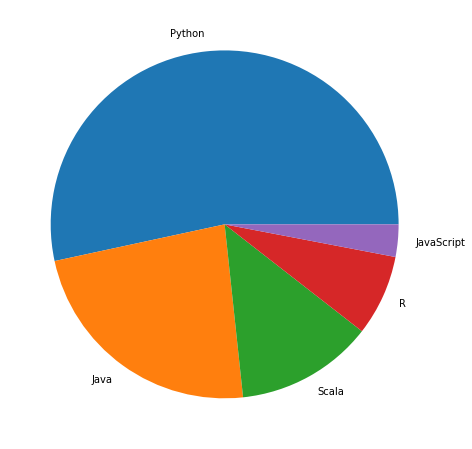

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,8]
plt.pie(slices, labels=labels, wedgeprops={wedgecolor=bl});